# Anatomical Abnormalities Associated with  Schizophrenia—An Observational Study 

In [1]:
# standard library imports
import pathlib
import functools

# 3rd party library imports
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

sns.set()

We begin by reading the data and summarizing the variables.

In [2]:
df = pd.read_csv('case0202.csv')
pd.options.display.float_format = "{:.2f}".format
df.describe()

,Unaffected,Affected
count,15.00,15.00
mean,1.76,1.56
std,0.24,0.30
min,1.25,1.02
25%,1.60,1.31
50%,1.77,1.59
75%,1.94,1.78
max,2.08,2.02


/Users/jevans/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/jevans/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


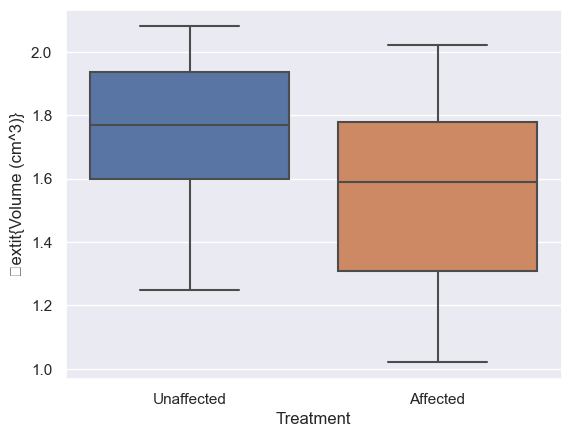

In [7]:
data = (
    df.stack()
      .reset_index()
      .rename({'level_1': 'Treatment', 0: 'Volume'}, axis='columns')
)
ax = sns.boxplot(data=data, x='Treatment', y='Volume')
h = ax.set_ylabel('\textit{Volume (cm^3)}')

In [6]:
sns.distplot(df.loc[df.Year == 1976, 'Depth'], rug=True, hist=False, label='1976', color='skyblue')
sns.distplot(df.loc[ori.Year == 1978, 'Depth'], rug=True, hist=False, label='1978', color='red')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'Year'

The distributions are approximately normal, with some evidence of a long tail.

In [ ]:
a = orig.loc[orig.Year == 1976, 'Depth']
b = orig.loc[orig.Year == 1978, 'Depth']
t, p = scipy.stats.ttest_ind(a, b, equal_var=False)
print(t, p)

In [ ]:
sp = np.sqrt( (sdf.loc[1976, ('Depth', 'std')] ** 2 + sdf.loc[1978, ('Depth', 'std')] ** 2) / 2)
se = sp * np.sqrt(2 / 178)
estimate = sdf.loc[1978, ('Depth', 'mean')] - sdf.loc[1976, ('Depth', 'mean')]
t95 = scipy.stats.t.ppf(0.975, 176)
ci = [estimate - t95 * se, estimate + t95 * se]
print(ci)

The a two sided p-value of only 8.7e-6, there is not sufficient evidence to reject the null hypothesis.